In [2]:
import torch
from preprocess.preprocess import make_joint_dataset
from model.vae import VAE
from plot.plot import plot_skeleton_3d, plot_loss


def find_device(force_cpu):

    if not force_cpu:
        if torch.cuda.is_available():
            device = torch.device("cuda")
        elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
            device = torch.device("mps")
        else:
            device = torch.device("cpu")
    else:
        device = torch.device("cpu")

    return device    

In [3]:
device = find_device(force_cpu=True)
print("Using device", device)

# Load the data
train_dataset = make_joint_dataset(device=device)
vae = VAE.train_routine(train_dataset=train_dataset, device=device)

Using device cpu


100%|██████████| 300/300 [00:11<00:00, 25.14it/s, loss=0.03]


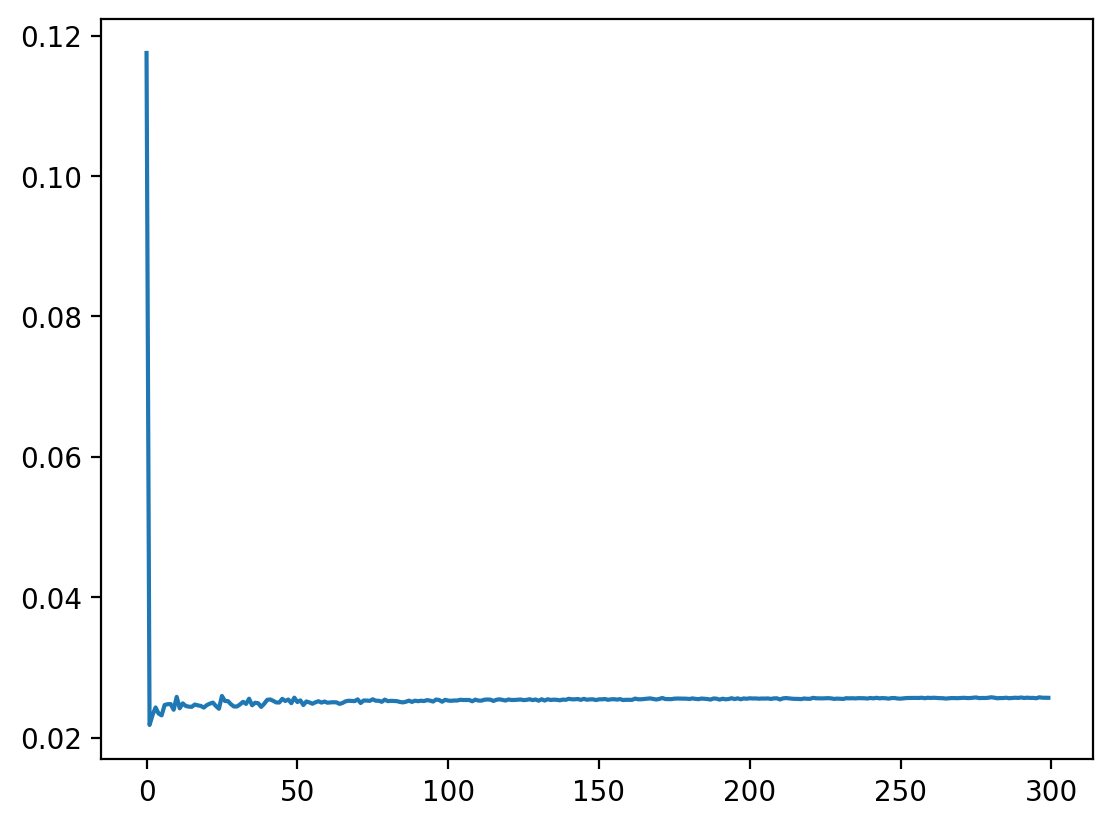

In [4]:
plot_loss(hist_loss=vae.hist_loss)

In [5]:
ex = train_dataset.x[1200]

In [6]:
with torch.no_grad():
    decoded, mu, std = vae(ex.clone())
    ex_prime = train_dataset.untransform_and_unscale(decoded.unsqueeze(0)).squeeze(0)

In [7]:
ex_for_plot = train_dataset.untransform_and_unscale(ex.unsqueeze(0)).squeeze(0)

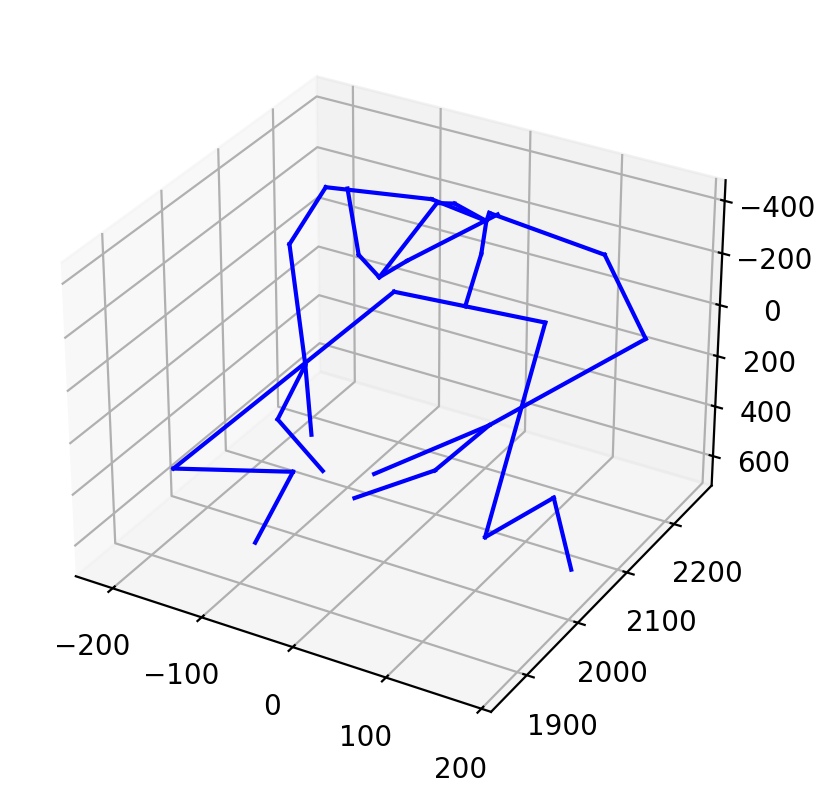

In [8]:
plot_skeleton_3d(ex_for_plot, train_dataset.joint_names)

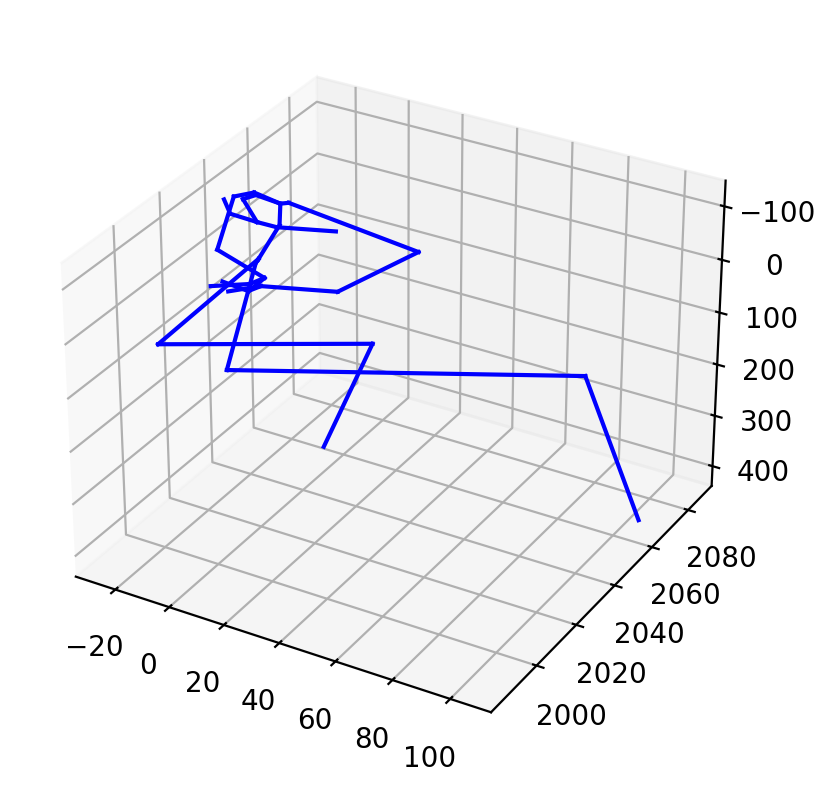

In [9]:
with torch.no_grad():
    decoded, _, _ = vae(ex.clone())
    ex_prime = train_dataset.untransform_and_unscale(decoded.unsqueeze(0)).squeeze(0)

plot_skeleton_3d(ex_prime.squeeze(0), train_dataset.joint_names)